# Гетероскедастичность
### Выполнили студенты БЭК181: 
* Николай Аверьянов
* Павел Ступацкий
* Сергей Тихонов

### План: 
1. Импортирование пакетов
2. Определение гетероскедастичности 
3. Оценка моделей, проверка гипотез и построение доверительных интервалов
4. Выявление гетероскедастичности

<img src="https://memegenerator.net/img/instances/53978393/am-i-the-only-one-around-here-who-worries-about-heteroscedasticity.jpg" width="600" height="1000"/>

## 1. Импортирование пакетов:

In [1]:
using Pkg
Pkg.add("RDatasets")
Pkg.add("Econometrics")
Pkg.add("LinearAlgebra")
Pkg.add("Gadfly")
Pkg.add("Distributions")
Pkg.add("TypedTables") # угол

In [2]:
using RDatasets
using Econometrics
using LinearAlgebra
using Gadfly
using Distributions
using TypedTables

## 2. Определение гетероскедастичности

Стандартная регрессионная модель с соблюдением предпосылок Гауса-Маркова имеет следующий вид:
$$y = X \beta + \varepsilon, \; \; \; \; E[\varepsilon]=0, \; \; \; \; Var[\varepsilon]=\sigma^{2}I.$$

В случае наличия гетероскедастичности нарушается предпосылка о постоянной дисперсии ошибок: $Var[\varepsilon_{i}]=\sigma^{2}_i, i=1,...,n$; тогда:

$$Var(\varepsilon)=\Omega=
\begin{equation*} \left(
\begin{array}{cccc}
\sigma^{2}_{1} & 0 & \ldots & 0\\
0 & \sigma^{2}_{2} & \ldots & 0\\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \ldots & \sigma^{2}_{n}
\end{array}
\right)
\end{equation*}$$

Ковариационная матрица имеет диагональный вид поскольку предпосылка об отсутствии автокорреляции не нарушается: $cov(\varepsilon_{i},\varepsilon_{j})=0$ при $i\neq j$, но дисперсии ошибок на главной диагонали могут различаться в зависимости от наблюдений.

### Последствия гетероскедастичности

1. Получаемые $\hat\beta_{OLS}$ не являются эффективными.
2. Несмещённости оценок $\hat\beta_{OLS}$ сохраняется.
3. Предпосылки для использования $t-$статистик нарушаются. Полученные $t-$статистики не имеют $t-$распределения. Проверка гипотез и построение доверительных интервалов по стандартным формулам приведут к неправильным результатам.
4. Аналогично, привычные $F-$статистики не имеют $F-$распределения при нормальных остатках, а также не имеют $\chi^{2}$-распределения асимптотически.

## 3. Оценка моделей, проверка гипотез и построение доверительных интервалов

### Построение модели

Для проверки гипотез о гетероскедастичности мы выбрали датасет с ценами на дома. Обратите внимание, что цены на дома могут сильно отличаться в рамках датасета, что уже является "следом" гетероскедастичности.

In [3]:
housing = dataset("Ecdat", "Housing") 
describe(housing)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Price,68121.6,25000,62000.0,190000,,,Int32
2,LotSize,5150.27,1650,4600.0,16200,,,Int32
3,Bedrooms,2.9652,1,3.0,6,,,Int32
4,Bathrms,1.28571,1,1.0,4,,,Int32
5,Stories,1.80769,1,2.0,4,,,Int32
6,Driveway,,no,,yes,2,,"CategoricalValue{String,UInt8}"
7,RecRoom,,no,,yes,2,,"CategoricalValue{String,UInt8}"
8,FullBase,,no,,yes,2,,"CategoricalValue{String,UInt8}"
9,Gashw,,no,,yes,2,,"CategoricalValue{String,UInt8}"


In [4]:
model =  fit(
    EconometricModel, 
    @formula(Price ~ 1 +  LotSize + Bedrooms + Bathrms + Stories + Driveway), 
    housing
)

Continuous Response Model
Number of observations: 546
Null Loglikelihood: -6339.36
Loglikelihood: -6119.22
R-squared: 0.5535
LR Test: 440.26 ∼ χ²(5) ⟹  Pr > χ² = 0.0000
Formula: Price ~ 1 + LotSize + Bedrooms + Bathrms + Stories + Driveway
Variance Covariance Estimator: OIM
───────────────────────────────────────────────────────────────────────────────────────
                      PE           SE      t-value  Pr > |t|         2.50%       97.50%
───────────────────────────────────────────────────────────────────────────────────────
(Intercept)    -11379.6      3869.42      -2.9409     0.0034  -18980.5      -3778.66
LotSize             4.91011     0.378722  12.965      <1e-32       4.16617      5.65406
Bedrooms         3387.04     1197.14       2.82929    0.0048    1035.44      5738.64
Bathrms         17280.7      1700.94      10.1595     <1e-21   13939.5      20622.0
Stories          6981.64      998.127      6.99474    <1e-11    5020.96      8942.32
Driveway: yes   10862.7      2327.

### Проверка гипотез и построение доверительных интервалов

Поскольку в данных присутствует гетероскедастичности, то при необходимости проверки гипотез и построения доверительных интервалов необходимо использовать правильную оценку ковариационной матрицы. Она имеет следующий вид:

$$\widehat{Var}_{HC}(\hat{\beta})=(X'X)^{-1}X'\hat\Omega X(X'X)^{-1}$$
$$\hat\Omega = diag(\hat\sigma^{2}_{1}, \ldots, \hat\sigma^{2}_{n})$$

Есть разные способы получить состоятельные оценки $\hat\sigma^{2}_{i}$. Изначально Гилбертом Уайтом (White, 1980) было предложено использовать квадраты остатков регрессии в качестве состоятельных оценок $\hat\sigma^{2}_{i}$ "HC0":

$$\hat\sigma^{2}_{i} = \hat\varepsilon^{2}_{i}$$

Впоследствие Скотт Лонг и Лари Ирвин (Long, Ervin, 2000) развили метод, в результате на сегодняшний день наиболее популярная оценка $\hat\sigma^{2}_{i}$ "HC3" имеет следующий вид:

$$\hat\sigma^{2}_{i} = \frac{\hat\varepsilon^{2}_{i}}{1-h_{ii}}$$

где $h_{ii}$ - диагональный элемент матрицы-щляпницы (hat-matrix), имеющей вид $H = X(X'X)^{-1}X'$.

Проверим гипотезы и построим доверительные интервалы, используя $НС0$:

In [5]:
#добавим квадраты остатков в наши данные
housing[!, "resid2"] = residuals(model).^2;

In [6]:
# confidence interval
cf0 = confint(model, level=0.95, se=sqrt.(diag(vcov(model, HC0))))
Table(coef=["Intercept", "LotSize", "Bedrooms", "Bathrms", "Stories", "Driveway yes"], left_95=cf0[:,1], right_95=cf0[:,2])

Table with 3 columns and 6 rows:
     coef          left_95   right_95
   ┌─────────────────────────────────
 1 │ Intercept     -18934.1  -3825.02
 2 │ LotSize       4.00406   5.81617
 3 │ Bedrooms      926.844   5847.23
 4 │ Bathrms       13028.5   21533.0
 5 │ Stories       5187.73   8775.55
 6 │ Driveway yes  7456.36   14269.1

In [7]:
# t-stats
tstats0 = coef(model) ./ sqrt.(diag(vcov(model, HC0)))
Table(coef=["Intercept", "LotSize", "Bedrooms", "Bathrms", "Stories", "Driveway yes"], t_stat=tstats0)

Table with 2 columns and 6 rows:
     coef          t_stat
   ┌───────────────────────
 1 │ Intercept     -2.95895
 2 │ LotSize       10.6453
 3 │ Bedrooms      2.7044
 4 │ Bathrms       7.98293
 5 │ Stories       7.645
 6 │ Driveway yes  6.26426

Значения тестовых статистик достаточно большие по модулю, что позволяет нам отвергнуть гипотезу о незначимости коэффициентов.

Для $НС3$ проверка гипотез и построение доверительных интервалов происходит схожим образом:

In [8]:
# confidence interval
cf3 = confint(model, level=0.95, se=sqrt.(diag(vcov(model, HC3))))
Table(coef=["Intercept", "LotSize", "Bedrooms", "Bathrms", "Stories", "Driveway yes"], left_95=cf3[:,1], right_95=cf3[:,2])

Table with 3 columns and 6 rows:
     coef          left_95   right_95
   ┌─────────────────────────────────
 1 │ Intercept     -19067.0  -3692.2
 2 │ LotSize       3.98401   5.83622
 3 │ Bedrooms      884.681   5889.4
 4 │ Bathrms       12929.9   21631.6
 5 │ Stories       5155.36   8807.92
 6 │ Driveway yes  7389.36   14336.1

In [9]:
# t-stats
tstats3 = coef(model) ./ sqrt.(diag(vcov(model, HC3)))
Table(coef=["Intercept", "LotSize", "Bedrooms", "Bathrms", "Stories", "Driveway yes"], t_stat=tstats3)

Table with 2 columns and 6 rows:
     coef          t_stat
   ┌───────────────────────
 1 │ Intercept     -2.90783
 2 │ LotSize       10.4148
 3 │ Bedrooms      2.65884
 4 │ Bathrms       7.80209
 5 │ Stories       7.50951
 6 │ Driveway yes  6.14341

Аналогично прошлому пункту отвергаем гипотезу о незначимости. Заметим, что значения статистик несколько отличаются от предыдущего пункта.

Помимо всего прочего, в условиях гетероскедастичности возникает проблема с $F-$статистикой для сравнения вложенных моделей, а именно:

$$F = \frac{(RSS_{R}-RSS_{UR})/r}{RSS_{UR}/(n-k_{UR})}$$

не имеет $F-$распределения при нормальных остатках, а также не имеет $\chi^{2}$-распределения асимптотически.

Эта проблема решается проведением теста Вальда с устойчивой к гетероскедастичности ковариационной матрицой.

Если в тесте Вальда использовать робастную оценку ковариационной матрицы, то его можно применять в условиях гетероскедастичности. Допустим, необходимо проверить гипотезу $H0: A\beta = b$ (в общем случае можно проверять различные гипотезы вида $H0: g(\beta)=0$), состоящую из $m$ уравнений, против альтернативы заключающейся в том, что хотя бы одно уравнение нарушено. В таком случае статистика Вальда имеет следующий вид:

$$W = (A\beta - b)'(A \widehat{Var}_{HC}(\hat\beta)A')^{-1}(A\beta - b) $$

и имеет асимптотически $\chi^{2}-$распределение с $m$ степенями свободы.

Проведём робастный $F-$тест на примере проверки значимости регрессии:

In [10]:
function waldtest(;β, b, V, α=0.05, A=I)
    """
    Performs Wald test
    R, b - restrictions on parameter 
    V - HC estimation of covarience matrix 
    """
    W = (A*β - b)' * inv(A * V * A') * (A*β - b)
    m = size(β)[1]
    border = cquantile(Chisq(m), α) #вычисляем правую границу доверительного интервала
    if W < border
        println("H_0 not rejected - Regression is insignificant")
    else
        println("H_0 rejected - Regression is significant")
    end
end

waldtest (generic function with 1 method)

In [11]:
waldtest(β = coef(model)[2:6], 
    b = zeros(size(coef(model)[2:6])), 
    V = vcov(model, HC3)[2:6, 2:6])

H_0 rejected - Regression is significant


## 4. Выявление гетероскедастичности

### I. На практике

На практике часто не проводятся тесты для обнаружения гетероскедастичности. Вместо этого можно визуализировать модули остатков в зависимости от регрессора: если размер остатка растет с размером регрессора, то имеет место гетероскедастичность; если же размер остатка стабилен с размером регрессора, то имеет место гомоскедастичность.

Для начала провизуализируем зависимость квадратов остатков от переменных, которые могут быть причиной гетероскедастичности:

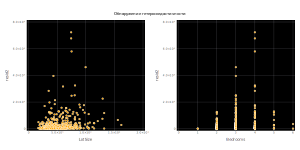

In [12]:
set_default_plot_size(30cm, 15cm)
p1 = Gadfly.plot(housing, x=:LotSize,y=:resid2, Theme(panel_fill=colorant"black", default_color=colorant"orange"))
p2 = Gadfly.plot(housing, x=:Bedrooms,y=:resid2, Theme(panel_fill=colorant"black", default_color=colorant"orange"))
stack = hstack(p1, p2) 
title(stack, "Обнаружение гетероскедастичности") 

Более того, исследователю предлагается действовать следующим образом:

* Если есть теоретические основания ожидать гетероскедастичность и имеется _много_ наблюдений, то лучше использовать устойчивые стандартные ошибки вне зависимости от результатов тестирования.
* Если есть теоретические основания ожидать гетероскедастичность и имеется _мало_ наблюдений, то придется отказаться от проверки гипотез и эффективных оценок и радоваться несмещённым оценкам.

Иными словами выбор той или иной ковариационной матрицы на практике не подвешивается на результаты тестов. 

### II. Формальные тесты

### Тест Уайта

* Не требуется предположение о нормальности остатков
* Тест применим только для выборок большого размера (асимптотический тест)

$H_0\!: \: Var(\varepsilon_{i})=\sigma^{2}  $

$H_a\!: \: Var(\varepsilon_{i})\neq\sigma^{2} \qquad \qquad \qquad \alpha=0.05 $

Алгоритм:
1\. Оценить основную регрессию, получить $\hat\varepsilon$:

$Y = \beta_{0} + \beta_{1}X_{1} + \ldots + \beta_{k}X_{k} + \epsilon$

2\. Оценить вспомогательную (aux) регрессию: 

$\hat\varepsilon^2 = \delta_{0} + \delta_{1}X_{1} + \ldots + \delta_{k}X_{k} + \gamma_{1}X^{2}_{1} + \ldots + \gamma_{k}X^{2}_{k} + \alpha_{1}X_{1}X_{2} + \ldots + \alpha_{k*(k-1)/2}X_{k-1}X_{k} + u$

Важно заметить, что во вспомогательную регрессию необязательно включать все квадраты и попарные произведения.

3\. Статистика Уайта: $LM = nR^{2}_{aux}$

При верной $H_{0}$ асимптотически: $LM \sim \chi^2_{m-1}$, где m - число оцениваемых во вспомогательной регрессии коэффициентов.

In [13]:
function White_test(LM_hat, num_param, α=0.05) 
    """
    Performs White's test
    LM_hat - nR^2
    num_param - number of parameters in the model
    """
    
    border = cquantile(Chisq(num_param-1), α) #вычисляем правую границу доверительного интервала
    if LM_hat < border
        println("H_0 not rejected => homoscedasticity")
    else
        println("H_0 rejected => heteroscedasticity")
    end
end

White_test (generic function with 2 methods)

Оценим вспомогательную регрессию:

In [14]:
aux_model = fit(
    EconometricModel, 
    @formula(resid2 ~ 1 + Bedrooms+Bedrooms^2+LotSize+LotSize^2+LotSize*Bedrooms), 
    housing
)

Continuous Response Model
Number of observations: 546
Null Loglikelihood: -11889.66
Loglikelihood: -11863.90
R-squared: 0.0901
LR Test: 51.53 ∼ χ²(5) ⟹  Pr > χ² = 0.0000
Formula: resid2 ~ 1 + Bedrooms + (Bedrooms ^ 2) + LotSize + (LotSize ^ 2) + LotSize & Bedrooms
Variance Covariance Estimator: OIM
────────────────────────────────────────────────────────────────────────────────────────────────────
                            PE             SE       t-value  Pr > |t|           2.50%         97.50%
────────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)            -3.58255e8      4.03048e8  -0.888863    0.3745      -1.14999e9      4.33477e8
Bedrooms                1.07134e8      2.24587e8   0.477027    0.6335      -3.34035e8      5.48303e8
Bedrooms ^ 2           -1.34861e7      3.36803e7  -0.400416    0.6890      -7.96462e7      5.2674e7
LotSize             36699.7        64216.1         0.571504    0.5679  -89443.7            1.62

In [15]:
LM_hat = nrow(housing) * r2(aux_model)
White_test(LM_hat, 6)

H_0 rejected => heteroscedasticity


### Тест Голдфельда-Кванта

* Имеет место переменная, от которой предположительно монотонно зависит дисперсия ошибок
* Необходимо предположение о нормальности ошибок
* Тест подходит для выборок малого размера

$H_0\!: \: Var(\varepsilon_{i})=\sigma^{2}  $

$H_a\!: \: Var(\varepsilon_{i})\neq \sigma^{2} \qquad \qquad \qquad \alpha=0.05 $

Алгоритм:
1. Сортируем наблюдения по предполагаемому убыванию дисперсии
2. Выкидываем часть наблюдений посередине (около 25%), чтобы подчеркнуть разницу между частями выборки
3. Оцениваем две вспомогательные регрессии по первым и последним наблюдениям ($n_{1}$ и $n_{2}$ соответственно)
4. Из вспомогательных регрессий получаем $RSS_{1}$, $RSS_{2}$
5. Вычисляем $F-$статистику:
$F = \frac{RSS_{1}/(n_{1}-k)}{RSS_{2}/(n_{2}-k)}$

При верной $H_0$: $F = \frac{RSS_{1}/(n_{1}-k)}{RSS_{2}/(n_{2}-k)} \sim F_{n_{1}-k, \, n_{2}-k}$

In [16]:
select!(housing, Not(:resid2)); #убираем квадраты остатков из таблички для того чтобы провести тест

In [17]:
function GQ_test(F_stat, num_obs1, num_obs2, k, α=0.05)
    """
    Performs GQ test
    F_stat - observed value of the F-stat
    num_obsj - number of observations in the model j
    """
    
    border = cquantile(FDist(num_obs1-k, num_obs2-k), α)
    if F_stat < border
        println("H_0 not rejected => homoscedasticity")
    else
        println("H_0 rejected => heteroscedasticity")
    end
end

GQ_test (generic function with 2 methods)

Отсортируем наши данные и разделим на две выборки, как того требует GQ-тест, после оценим модели по каждой из выборок:

In [18]:
sort!(housing, [:LotSize], rev=true) 
n = nrow(housing)
housing1 = housing[1:Int((n-floor(n * 0.25))/2), :]
housing2 = housing[Int((n+floor(n * 0.25))/2)+1:n, :];

In [19]:
model1 =  fit(
    EconometricModel, 
    @formula(Price ~ 1 +  LotSize + Bedrooms + Bathrms + Stories + Driveway), 
    housing1
)

Continuous Response Model
Number of observations: 205
Null Loglikelihood: -2392.18
Loglikelihood: -2334.26
R-squared: 0.4318
LR Test: 115.84 ∼ χ²(5) ⟹  Pr > χ² = 0.0000
Formula: Price ~ 1 + LotSize + Bedrooms + Bathrms + Stories + Driveway
Variance Covariance Estimator: OIM
─────────────────────────────────────────────────────────────────────────────────────────
                      PE            SE      t-value  Pr > |t|          2.50%       97.50%
─────────────────────────────────────────────────────────────────────────────────────────
(Intercept)    -14632.0      12575.1       -1.16357    0.2460  -39428.8       10164.7
LotSize             1.89055      0.861287   2.19503    0.0293       0.192185      3.58892
Bedrooms         7746.94      2635.62       2.93932    0.0037    2549.77      12944.1
Bathrms         19755.8       3103.63       6.36539    <1e-8    13635.8       25875.8
Stories          4763.8       1606.97       2.96446    0.0034    1595.02       7932.57
Driveway: yes   2641

In [20]:
model2 =  fit(
    EconometricModel, 
    @formula(Price ~ 1 +  LotSize + Bedrooms + Bathrms + Stories + Driveway), 
    housing2
)

Continuous Response Model
Number of observations: 205
Null Loglikelihood: -2263.62
Loglikelihood: -2228.61
R-squared: 0.2895
LR Test: 70.01 ∼ χ²(5) ⟹  Pr > χ² = 0.0000
Formula: Price ~ 1 + LotSize + Bedrooms + Bathrms + Stories + Driveway
Variance Covariance Estimator: OIM
─────────────────────────────────────────────────────────────────────────────────────
                     PE          SE       t-value  Pr > |t|        2.50%       97.50%
─────────────────────────────────────────────────────────────────────────────────────
(Intercept)    -1170.68     7126.74     -0.164266    0.8697  -15223.9     12882.5
LotSize            5.66987     1.71681   3.30256     0.0011       2.2845      9.05524
Bedrooms        2404.5      1475.1       1.63006     0.1047    -504.244    5313.24
Bathrms        10553.8      2227.98      4.73692     <1e-5     6160.42    14947.1
Stories         6779.8      1919.58      3.53191     0.0005    2994.58    10565.0
Driveway: yes   5686.69     2159.33      2.63354     

In [21]:
F_stat = (rss(model1)/(nrow(housing1)-5))/(rss(model2)/(nrow(housing2)-5))
GQ_test(F_stat, 205, 205, 6)

H_0 rejected => heteroscedasticity
